<ipython-input-12-f7c138e656b4>:22: FutureWarning: pad is deprecated and will be removed in a future version. Use ffill instead.
  df_5min = df_novo.resample('5Min').pad()


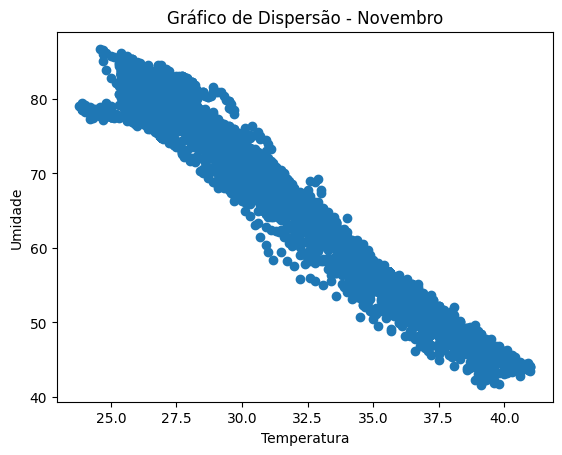

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ler o arquivo .xlsx
df = pd.read_excel('/content/Dados de Novembro.xlsx', sheet_name='Planilha1')

# Filtrar os dados de temperatura e umidade
df_filtrado = df[(df["Temperatura"] >= 20) & (df["Umidade"] >= 40)]

# Realizar a interpolação dos dados
tempo = pd.to_datetime(df['Data'] + ' ' + df['Hora'])
temperatura = df_filtrado["Temperatura"]
umidade = df_filtrado["Umidade"]

# Criar um novo DataFrame com as colunas de interesse
df_novo = pd.DataFrame({'tempo': tempo, 'temperatura': temperatura, 'umidade': umidade})

# Definir a coluna 'tempo' como índice
df_novo.set_index('tempo', inplace=True)

# Reamostrar os dados para a frequência de 5 minutos
df_5min = df_novo.resample('5Min').pad()

# Obter os valores reamostrados
temperatura_5min = df_5min["temperatura"]
umidade_5min = df_5min["umidade"]

# Criar o gráfico de dispersão
plt.scatter(temperatura_5min, umidade_5min)
plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.title('Gráfico de Dispersão - Novembro')
plt.show()




<ipython-input-13-931c41851ce6>:22: FutureWarning: pad is deprecated and will be removed in a future version. Use ffill instead.
  df_5min = df_novo.resample('5Min').pad()


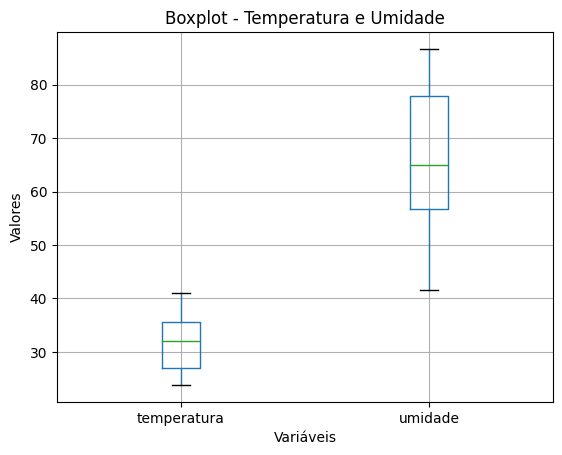

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ler o arquivo .xlsx
df = pd.read_excel('/content/Dados de Novembro.xlsx', sheet_name='Planilha1')

# Filtrar os dados de temperatura e umidade
df_filtrado = df[(df["Temperatura"] >= 20) & (df["Umidade"] >= 40)]

# Realizar a interpolação dos dados
tempo = pd.to_datetime(df['Data'] + ' ' + df['Hora'])
temperatura = df_filtrado["Temperatura"]
umidade = df_filtrado["Umidade"]

# Criar um novo DataFrame com as colunas de interesse
df_novo = pd.DataFrame({'tempo': tempo, 'temperatura': temperatura, 'umidade': umidade})

# Definir a coluna 'tempo' como índice
df_novo.set_index('tempo', inplace=True)

# Reamostrar os dados para a frequência de 5 minutos
df_5min = df_novo.resample('5Min').pad()

# Gráfico de Boxplot
df_5min.boxplot(column=['temperatura', 'umidade'])
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.title('Boxplot - Temperatura e Umidade')
plt.show()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 288 entries, 2023-06-15 00:00:00 to 2023-06-15 23:55:00
Freq: 5T
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperatura  288 non-null    float64
 1   umidade      288 non-null    float64
dtypes: float64(2)
memory usage: 6.8 KB


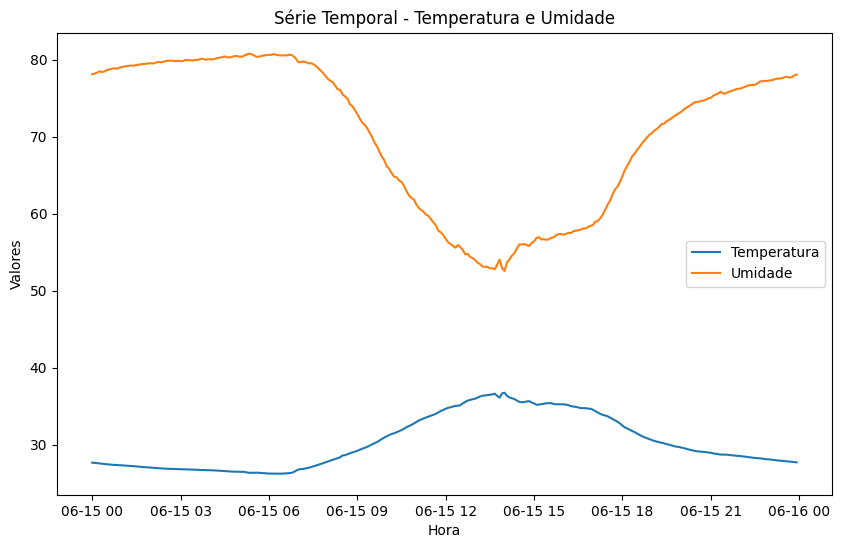

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Ler o arquivo .xlsx
df = pd.read_excel('/content/Dados de Novembro.xlsx', sheet_name='Planilha1')

# Filtrar os dados de temperatura e umidade
df_filtrado = df[(df["Temperatura"] >= 20) & (df["Umidade"] >= 40)]

# Realizar a interpolação dos dados
hora = pd.to_datetime(df['Hora'], format='%H:%M:%S').dt.time
temperatura = df_filtrado["Temperatura"]
umidade = df_filtrado["Umidade"]

# Criar um novo DataFrame com as colunas de interesse
df_novo = pd.DataFrame({'hora': hora, 'temperatura': temperatura, 'umidade': umidade})

# Converter a coluna 'hora' para o tipo datetime
df_novo['hora'] = pd.to_datetime(df_novo['hora'].astype(str))

# Definir a coluna 'hora' como índice
df_novo.set_index('hora', inplace=True)

# Reamostrar os dados para a frequência de 5 minutos
df_5min = df_novo.resample('5Min').mean().ffill()


df_5min
df_5min.info()

# Gráfico de Série Temporal
plt.figure(figsize=(10, 6))
plt.plot(df_5min.index, df_5min['temperatura'], label='Temperatura')
plt.plot(df_5min.index, df_5min['umidade'], label='Umidade')
plt.xlabel('Hora')
plt.ylabel('Valores')
plt.title('Série Temporal - Temperatura e Umidade')
plt.legend()
plt.show()


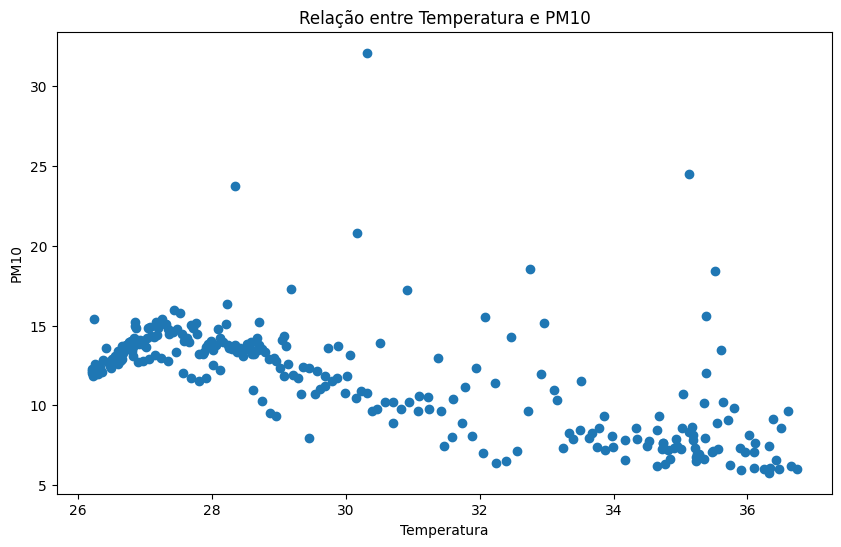

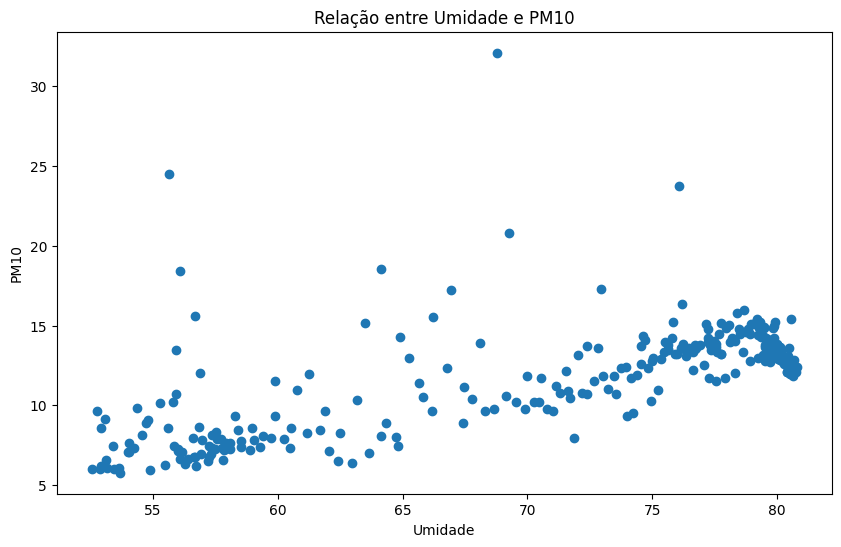

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Ler o arquivo .xlsx
df = pd.read_excel('/content/Dados de Novembro.xlsx', sheet_name='Planilha1')

# Filtrar os dados de temperatura, umidade e PM10
df_filtrado = df[(df["Temperatura"] >= 20) & (df["Umidade"] >= 40)]

# Realizar a interpolação dos dados
hora = pd.to_datetime(df['Hora'], format='%H:%M:%S').dt.time
temperatura = df_filtrado["Temperatura"]
umidade = df_filtrado["Umidade"]
pm10 = df_filtrado["PM10"]

# Criar um novo DataFrame com as colunas de interesse
df_novo = pd.DataFrame({'hora': hora, 'temperatura': temperatura, 'umidade': umidade, 'pm10': pm10})

# Converter a coluna 'hora' para o tipo datetime
df_novo['hora'] = pd.to_datetime(df_novo['hora'].astype(str))

# Definir a coluna 'hora' como índice
df_novo.set_index('hora', inplace=True)

# Reamostrar os dados para a frequência de 5 minutos
df_5min = df_novo.resample('5Min').mean().ffill()

# Gráfico de relação entre Temperatura e PM10
plt.figure(figsize=(10, 6))
plt.scatter(df_5min['temperatura'], df_5min['pm10'])
plt.xlabel('Temperatura')
plt.ylabel('PM10')
plt.title('Relação entre Temperatura e PM10')
plt.show()

# Gráfico de relação entre Umidade e PM10
plt.figure(figsize=(10, 6))
plt.scatter(df_5min['umidade'], df_5min['pm10'])
plt.xlabel('Umidade')
plt.ylabel('PM10')
plt.title('Relação entre Umidade e PM10')
plt.show()
